In [162]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import matplotlib.animation as animation
from math import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
# Condiciones iniciales

x_0 = 1 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

# Definiciones iniciales

w_0 = 0.5 # Frecuencia natural x>0
W_0 = 100 # Frecuencia natural x<0
amort = 0.125 # constante de amortiguamiento
f_0 = 0.25 # Amplitud de la fuerza por unidad de masa

dt = 0.01 # Paso de tiempo
tf = 50000 # Tiempo de medida (se asume que t0 = 0)
t = np.linspace(0,tf,int(tf/dt)+1) # Vector de instantes de tiempo

In [164]:
def W(x): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

In [165]:
def EDO(t,y,w):
    x,v = y
    return [v,-2*amort*v-W(x)**2*x+f_0*np.cos(w*t)]

In [172]:
w = 1.395

xp = []
vp = []

sol = scipy.integrate.solve_ivp(EDO, [0,tf], [x_0,v_0], method = 'RK23',t_eval = t,args = [w])
x,v = sol.y

In [167]:
T = 2*pi/w # Periodo fuerza externa
n = int(tf/T) # Número de puntos del diagrama de Poincaré

for j in range(int(np.round(T*10))):
    ind = np.array([np.searchsorted(t,T*(i+1)+j*0.1) for i in range(n-1)]) # Calculamos los índices del diagrama de Poincaré
    xp.append(x[ind]) # Asignamos índices encontrados en tiempos con posiciones y velocidades (/max(x[ind]))
    vp.append(v[ind])

In [170]:
def update_Poincare(num,xp,vp):
    plt.cla()
    plt.plot(xp[num][50:],vp[num][50:],'.',color='red',markersize='1',alpha = 0.5)
    plt.xlim([-0.05,0.8])
    plt.ylim([-0.5,0.5])
    plt.title('Diagrama de Poincaré (ω = '+str(format(w,'.1f'))+')')
    plt.xlabel('x')
    plt.ylabel('v')
    plt.suptitle('Puntos registrados cada T+'+str(format(num*0.1,'.1f'))+' s')

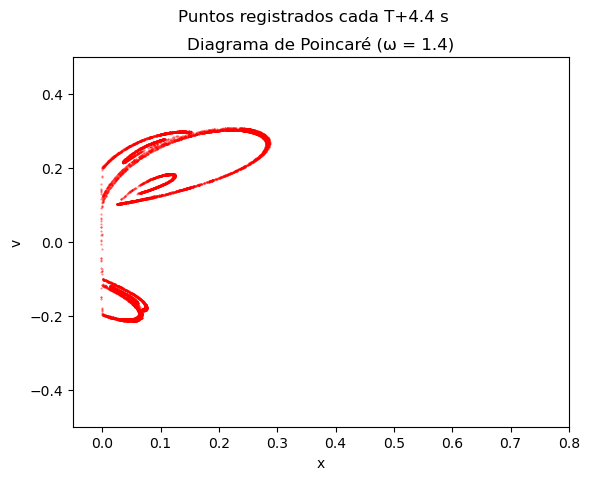

In [171]:
im = plt.figure()
fig = plt.plot(xp[0][50:],vp[0][50:],'.',color='red',markersize='1',alpha = 0.5)
plt.xlim([-0.05,0.8])
plt.ylim([-0.5,0.5])
plt.title('Diagrama de Poincaré (ω = '+str(format(w,'.1f'))+')')
plt.xlabel('x')
plt.ylabel('v')
plt.suptitle('Puntos registrados cada T+'+str(format(0,'.1f'))+' s')

animP = animation.FuncAnimation(im, update_Poincare, int(np.round(T*10)), fargs = (xp,vp, ), interval = 100)
animP.save('Evolución Poincaré2.gif')
animP.save('Evolución Poincaré2.mp4')